# –î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ 1


## –û–ø–∏—Å–∞–Ω–∏–µ

–í —ç—Ç–æ–π –¥–æ–º–∞—à–Ω–µ–π —Ä–∞–±–æ—Ç–µ –≤—ã –¥–æ–ª–∂–Ω—ã –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∑–Ω–∞–Ω–∏—è –ø–æ –º–Ω–æ–≥–æ—Å–ª–æ–π–Ω—ã–º –Ω–µ–π—Ä–æ–Ω—ã–º —Å–µ—Ç—è–º

- –î–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å —Å–Ω–∞—á–∞–ª–∞ –æ–¥–Ω–æ—Å–ª–æ–π–Ω—ã–π –ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω
- –†–µ—à–∞—Ç—å –±—É–¥–µ–º –ø—Ä–æ—Å—Ç—É—é –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
- –î–∞—Ç–∞—Å–µ—Ç –∏–≥—Ä—É—à–µ—á–Ω—ã–π -  `load_data()` –∑–∞–≥—Ä—É–∂–∞–µ—Ç –µ–≥–æ


In [5]:
!pip install torch

In [1]:
import numpy as np
import torch
from torch import nn
from torch.nn import init
import sklearn
import torch.optim as optim
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.model_selection import StratifiedKFold
from itertools import product
from sklearn.preprocessing import StandardScaler

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [2]:
def load_data(n_samples=500):
    return make_gaussian_quantiles(
        mean=None,
        cov=0.7,
        n_samples=n_samples,
        n_features=2,
        n_classes=2,
        shuffle=True,
        random_state=42,
    )

In [3]:
gaussian_quantiles = load_data()
X, y = gaussian_quantiles

print(X[:10, :])
print(y[:10])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


[[-1.13773727  0.62436053]
 [-0.75970745 -1.18161805]
 [-0.82471758  0.42171557]
 [-0.09398039 -0.18487643]
 [-0.80731289  0.57399183]
 [ 0.67980788  1.13471182]
 [-1.70521733 -0.84342552]
 [ 1.57461467  1.12565917]
 [-0.22579357 -0.81889248]
 [ 0.97317262  0.00856159]]
[1 1 0 0 1 1 1 1 0 1]


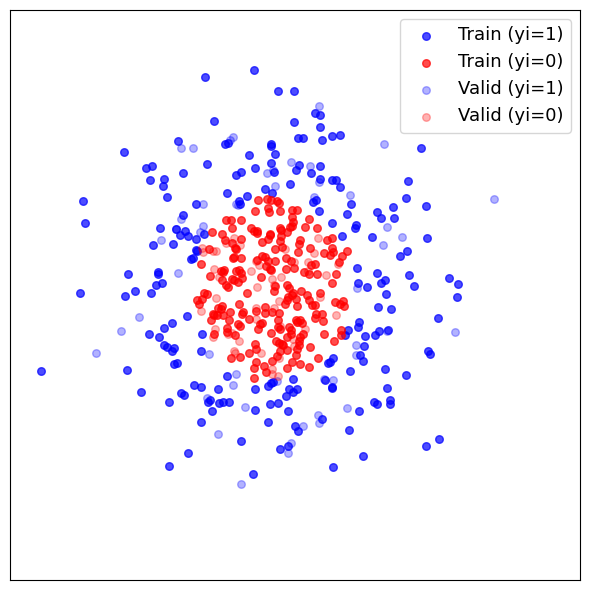

In [4]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_data(X, y, xy_labels=True, label=None, **kwargs):
    X_1 = X[y == 1]
    X_0 = X[y == 0]
    if label is not None:
        plt.scatter(X_1[:, 0], X_1[:, 1], c="blue", s=30, label=label + " (yi=1)", **kwargs)
        plt.scatter(X_0[:, 0], X_0[:, 1], c="red", s=30, label=label + " (yi=0)", **kwargs)
    plt.xticks(())
    plt.yticks(())
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.figure(figsize=(6, 6))
plot_data(X_train, y_train, alpha=0.7, label="Train")
plot_data(X_test, y_test, alpha=0.3, label="Valid")
plt.legend(fontsize=13)
plt.tight_layout()

## –ö–ª–∞—Å—Å –Ω–µ–π—Ä–æ—Å–µ—Ç–∏

–í–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–ø–∏—Å–∞—Ç—å –ø—Ä–æ—Å—Ç—É—é –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—É—é –º–Ω–æ–≥–æ—Å–ª–æ–π–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, initializer=None):
        ### YOUR CODE HERE
        super().__init__()
        self.layer1 = nn.Linear(2, 4)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
        self.loss_history = []

        if initializer:
            self.apply(self.initialize_weight(initializer))


    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

    def initialize_weight(self, initializer):
        def initialize_fun(model):
            if isinstance(model, nn.Linear):
                initializer.initialize(model.weight)
                if model.bias is not None:
                    init.zeros_(model.bias) 

        return initialize_fun




##  –§—É–Ω–∫—Ü–∏—è –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –∏—Å—Ç–æ—Ä–∏—é –ª–æ—Å—Å–æ–≤ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏.
–¢–∞–∫–∂–µ –Ω—É–∂–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å early stopping. –ö—Ä–∏—Ç–µ—Ä–∏–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –ø–æ–¥–±–∏—Ä–∏—Ç–µ –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ.

In [6]:
def train_model(model, loss, opt,
          X_train, y_train,
          n_epochs=300, batch_size=16):

    loss_fn = loss
    optim = opt['function']
    optimizer = optim(model.parameters(), **opt['params'])
    batch_start = torch.arange(0, len(X_train), batch_size)

    model.train()
    eps = 10**(-8)
    for epoch in range(n_epochs):
        loss_sum = 0
        count = 0
        for start in batch_start:
            count += 1
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss_sum += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.loss_history.append(loss_sum / count)
        if epoch > 2 and abs(model.loss_history[-1] - model.loss_history[-2]) < eps:
            break
    return

### –û–±—É—á–∏—Ç–µ —Å–µ—Ç—å

–û–±—É—á–∏—Ç–µ —Å–µ—Ç—å —Ç—Ä–∏ —Ä–∞–∑–∞ - —Å —Ç—Ä–µ–º—è —Ä–∞–∑–Ω—ã–º–∏ –æ–ø—Ç–∏–º–∏–∑–∏—Ç–æ—Ä–∞–º–∏
–ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø–µ—Ä–µ–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å–µ—Ç—å –∑–∞–Ω–æ–≥–æ –ø–µ—Ä–µ–¥ –∫–∞–∂–¥–æ–π –∑–∞–≥—Ä—É–∑–∫–æ–π. –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –≤—ã –≤–µ—Ä–Ω–æ –ø–µ—Ä–µ–¥–∞–ª–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–µ—Ç–∏ –≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä

**–ü–æ–¥—Å–∫–∞–∑–∫–∞** –õ—É—á—à–µ –æ–±—ä—è–≤–∏—Ç—å —Ç—Ä–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –æ–±—ä–µ–∫—Ç–∞ - –º–æ–¥–µ–ª—å1, –º–æ–¥–µ–ª—å2 –∏ –º–æ–¥–µ–ª—å3

In [7]:
X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train).float().reshape(-1, 1)
X_valid_torch = torch.from_numpy(X_test).float()
y_valid_torch = torch.from_numpy(y_test).float().reshape(-1, 1)

model_list = []
accuracies = []


optims = {'SGD': {'function': optim.SGD, 
                    'params': {'lr': 0.01,
                               'momentum': 0.8}
                    }, 
          'Adam': {'function': optim.Adam, 
                    'params': {'lr': 0.01}
                    },
          'RMSProp': {'function': optim.RMSprop, 
                    'params': {'lr': 0.01,
                               'alpha': 0.9}
                    }, 
}

for opt_name, opt in optims.items():
    model = NeuralNetwork()
    model_list.append(model)
    train_model(model, loss=nn.BCELoss(), opt=opt, X_train=X_train_torch, y_train=y_train_torch)
    model.eval()
    y_pred = model(X_valid_torch)
    acc = (y_pred.round() == y_valid_torch).float().mean()
    acc = float(acc)
    print(f"Accuracy {opt_name}: %.2f " % acc)
    accuracies.append(acc)

Accuracy SGD: 0.81 
Accuracy Adam: 0.98 
Accuracy RMSProp: 0.95 


### –ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –ª–æ—Å—Å–æ–≤

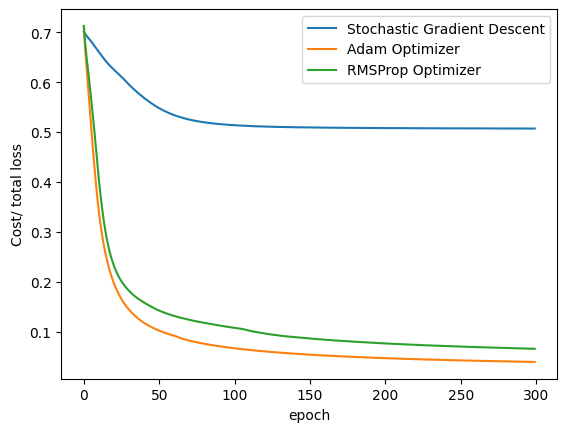

In [8]:
loss_SGD = model_list[0].loss_history
loss_Adam = model_list[1].loss_history
loss_rmsprop = model_list[2].loss_history
plt.plot(loss_SGD, label = "Stochastic Gradient Descent")
plt.plot(loss_Adam, label = "Adam Optimizer")
plt.plot(loss_rmsprop, label = 'RMSProp Optimizer')
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

### –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è

–¢–µ–ø–µ—Ä—å –ø—Ä–æ–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–µ—Å–∞ –≤ –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏: —Å–ª—É—á–∞–π–Ω–æ –∏ –ö—Å–∞–≤—å–µ—Ä–æ–º. –°—Ä–∞–≤–Ω–∏—Ç–µ —ç—Ç–∏ –¥–≤–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–π –∑–∞–¥–∞—á–µ.

In [9]:
class RandomNetwork:
    def __init__(self, gain=1.0):
        self.gain = gain
        
    def initialize(self, tensor):
        init.uniform_(tensor)

class XavierNetwork:
    def __init__(self, gain=1.0):
        self.gain = gain
        
    def initialize(self, tensor):
        init.xavier_uniform_(tensor, gain=self.gain)



In [10]:
list_mode = [RandomNetwork(), XavierNetwork()]
for opt_name, opt in optims.items():
    for i in range(2):
        model = NeuralNetwork(list_mode[i])
        model_list.append(model)
        train_model(model, loss=nn.BCELoss(), opt=opt, X_train=X_train_torch, y_train=y_train_torch)
        model.eval()
        y_pred = model(X_valid_torch)
        acc = (y_pred.round() == y_valid_torch).float().mean()
        acc = float(acc)
        print(f"Accuracy {opt_name} + {type(list_mode[i]).__name__}: %.2f " % acc)
        accuracies.append(acc)


Accuracy SGD + RandomNetwork: 0.94 
Accuracy SGD + XavierNetwork: 0.95 
Accuracy Adam + RandomNetwork: 0.98 
Accuracy Adam + XavierNetwork: 0.75 
Accuracy RMSProp + RandomNetwork: 0.96 
Accuracy RMSProp + XavierNetwork: 0.97 


In [11]:
#—Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤–µ—Å–æ–≤
for opt_name, opt in optims.items():
    model = NeuralNetwork()
    model_list.append(model)
    train_model(model, loss=nn.BCELoss(), opt=opt, X_train=X_train_torch, y_train=y_train_torch)
    model.eval()
    y_pred = model(X_valid_torch)
    acc = (y_pred.round() == y_valid_torch).float().mean()
    acc = float(acc)
    print(f"Accuracy {opt_name}: %.2f " % acc)
    accuracies.append(acc)

Accuracy SGD: 0.68 
Accuracy Adam: 0.97 
Accuracy RMSProp: 0.98 


–î–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ (SGD, Adam, RMSProp) –∫–∞—Å—Ç–æ–º–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ –ø–æ–∫–∞–∑–∞–ª –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –∏ –≤—ã—Å–æ–∫–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –ü—Ä–∏ –º–Ω–æ–≥–æ–∫—Ä–∞—Ç–Ω—ã—Ö –∑–∞–ø—É—Å–∫–∞—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –≤—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω–∞–±–ª—é–¥–∞–ª—Å—è —à–∏—Ä–æ–∫–∏–π —Ä–∞–∑–±—Ä–æ—Å –∑–Ω–∞—á–µ–Ω–∏–π —Ç–æ—á–Ω–æ—Å—Ç–∏.
–°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–¥–æ–±—Ä–∞–Ω–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–≤–µ–ª–∏—á–∏—Ç—å —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∏ –¥–µ–ª–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±–æ–ª–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º—ã–º.

## –ê —Ç–µ–ø–µ—Ä—å —Ä–µ—à–∏—Ç–µ –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤—É—é –ø—Ä–æ–±–ª–µ–º—É

–ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–π—Ç–µ —Å–≤–æ–∏ –∑–Ω–∞–Ω–∏—è - —Ä–µ—à–∏—Ç–µ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—É—é –ø—Ä–æ–±–ª–µ–º—É
–ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏, –º–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –∏ –∫–æ–ª-–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤.

**–ù–∞–π–¥–∏—Ç–µ –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —á–µ—Ä–µ–∑ KFold**

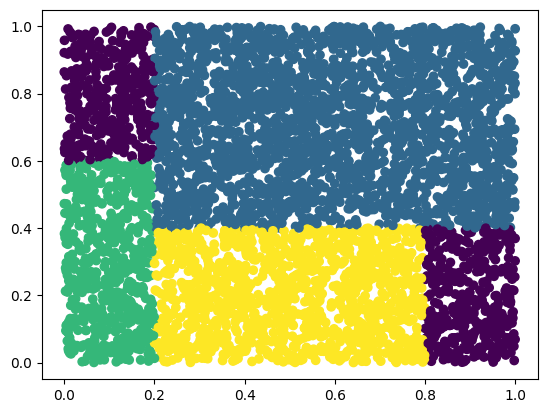

In [12]:
points = torch.rand(5000,2)
target = []
for p in points:
    if p[0]>0.2 and p[1]>0.4:
        target.append(1)
    elif p[0]<0.2 and p[1]<0.6:
        target.append(2)
    elif p[0]>0.2 and p[0]<0.8 and p[1] < 0.5:
        target.append(3)
    else:
        target.append(0)

target = torch.FloatTensor(target)
data = torch.as_tensor(np.column_stack((points,target)))

X = torch.as_tensor(points, dtype=torch.float32)
y = torch.as_tensor(target, dtype=torch.long)

X_train, y_train = X[:800], y[:800]
X_valid, y_valid = X[800:900], y[800:900]
X_test,  y_test  = X[900:],  y[900:]

plt.scatter(data[:,0],data[:,1],c = data[:,2])
plt.show()

In [13]:
class AdvancedModel(nn.Module):
    def __init__(self,initializer, input_dim=2, hidden_dim=6, output_dim=4, batch_norm=False):
        super(AdvancedModel, self).__init__()
        self.batch_norm = batch_norm
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        if batch_norm:
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        self.loss_history = [] #—Ç—É—Ç —Ö—Ä–∞–Ω–∏—Ç—Å—è –∏—Å—Ç–æ—Ä–∏—è loss

        if initializer:
            self.apply(self.initialize_weight(initializer))


    def forward(self, x):
        x = self.layer1(x)
        if self.batch_norm:
            x = self.batch_norm1(x)
        x = self.act1(x)
        x = self.layer2(x)
        return x

    def initialize_weight(self, initializer):
        def initialize_fun(model):
            if isinstance(model, nn.Linear):
                initializer.initialize(model.weight)
                if model.bias is not None:
                    init.zeros_(model.bias) 

        return initialize_fun


In [15]:
model = AdvancedModel(initializer=XavierNetwork()) 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [16]:
def train_model(model, loss, optimizer,
                X_train, y_train, X_val, y_val,
                n_epochs=300, batch_size=16):
    
    loss_fn = loss
    batch_start = torch.arange(0, len(X_train), batch_size)

    model.train()
    eps = 10**(-8)
    for epoch in range(n_epochs):
        loss_sum = 0
        count = 0
        for start in batch_start:
            count += 1
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss_sum += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.loss_history.append(loss_sum / count)
        if epoch > 2 and abs(model.loss_history[-1] - model.loss_history[-2]) < eps:
            break

    # evaluation
    model.eval()
    y_pred = model(X_val)
    y_pred = torch.argmax(y_pred, dim=1)
    acc = (y_pred == y_val).float().mean()
    acc = float(acc)
    return acc



In [17]:
list_mode = [RandomNetwork(), XavierNetwork()]

optims = {'SGD': {'function': optim.SGD, 
                    'params': {'lr': np.logspace(-3, -1, 3).tolist(),
                               'momentum': torch.linspace(0.5, 0.99, 3).tolist()}
                    }, 
          'Adam': {'function': optim.Adam, 
                    'params': {'lr': np.logspace(-3, -1, 4).tolist()}
                    },
          'RMSProp': {'function': optim.RMSprop, 
                    'params': {'lr': np.logspace(-3, -1, 3).tolist(),
                               'alpha': torch.linspace(0.8, 0.99, 3).tolist()}
                    }, 
}

param_grid = {
    'initializer': list_mode,
    'hidden_dim': [8, 16],
    'optimizer': list(optims.keys()),
    'epochs': [30],
}


In [18]:
# run 5-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_acc = 0
best_config = None
#–¢—É—Ç –±—É–¥–µ—Ç –Ω–µ –æ—á–µ–Ω—å –∫—Ä–∞—Å–∏–≤—ã–π –∫–æ–¥, —Å –ø–µ—Ä–µ–±–æ—Ä–æ–º —Ä–∞–∑–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤( 
param_names = list(param_grid.keys())
param_values = list(param_grid.values())
loss_fn = nn.CrossEntropyLoss()
#–ø–µ—Ä–µ–±–æ—Ä  –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞, –∫–æ–ª-–≤–∞ —ç–ø–æ—Ö, —Ä–∞–∑–º–µ—Ä —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤
for conf in product(*param_values):
    
    #—Ç—É—Ç —Å–ª–æ–≤–∞—Ä–∏ —Å –Ω–∞–∑–≤–∞–Ω–∏–µ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞, –∫–æ–ª-–≤–∞ —ç–ø–æ—Ö, —Ä–∞–∑–º–µ—Ä —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤
    config = dict(zip(param_names, conf)) 

    initializer = config['initializer']
    hidden_dim = int(config['hidden_dim'])
    epochs = int(config['epochs'])
    
    #–±–µ—Ä–µ–º —Ñ—É–Ω–∫—Ü–∏—é –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞
    opt = optims[config['optimizer']]['function'] 
    
    #–î–æ—Å—Ç–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä –∏ —Å–µ—Ç–∫—É –∑–Ω–∞—á–µ–Ω–∏–π
    opt_param_names = list(optims[config['optimizer']]['params'].keys())
    opt_param_values = list(optims[config['optimizer']]['params'].values())
    
    #—Ç–∞–∫ –∫–∞–∫ –≤–Ω—É—Ç—Ä–∏ –æ–ø—Ç–∏–º–∞–π–∑–µ—Ä–∞ –µ—Å—Ç—å –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã(lr, momentum, alpha), —Ç–æ –¥–∞–ª—å—à–µ –º—ã –∏—Ö –∏ –ø–µ—Ä–µ–±–∏—Ä–∞–µ–º
    for param_comb in product(*opt_param_values):
        
        #—Ç—É—Ç —Ö—Ä–∞–Ω—è—Ç—Å—è –¥–∞–Ω–Ω—ã–µ –æ –ø–∞—Ä–º–µ—Ç—Ä–∞—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –≤ –¥–∞–Ω–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ 
        opt_param_dict = dict(zip(opt_param_names, param_comb))
        
        accuracies = []
        
        for train, test in kfold.split(X, y):
            model = AdvancedModel(initializer=initializer, hidden_dim=hidden_dim)  # –∏–ª–∏ RandomNetwork()
            loss_fn = nn.CrossEntropyLoss()
            optimizer = opt(model.parameters(), **opt_param_dict)
            acc = train_model(model,loss_fn, optimizer, X[train], y[train], X[test], y[test], n_epochs=epochs)
            accuracies.append(acc)

        mean = np.mean(accuracies)
        if mean > best_acc:
                best_acc = mean
                best_config = {
                    'initializer': initializer,
                    'hidden_dim': hidden_dim,
                    'optimizer_name': config['optimizer'],
                    'optimizer_params': opt_param_dict,
                    'epochs': epochs
                }
        
print("\nüîç Best Configuration:")
print(f"Accuracy: {best_acc:.4f}")
print(f"Config: {best_config}")


üîç Best Configuration:
Accuracy: 0.9780
Config: {'initializer': <__main__.XavierNetwork object at 0x318064a00>, 'hidden_dim': 16, 'optimizer_name': 'RMSProp', 'optimizer_params': {'lr': 0.01, 'alpha': 0.9900000095367432}, 'epochs': 30}


In [19]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = []
for train, test in kfold.split(X, y):
    model = AdvancedModel(initializer=XavierNetwork(), hidden_dim=8) 
    loss_fn = nn.CrossEntropyLoss()
    opt = optims[best_config['optimizer_name']]['function']
    optimizer = opt(model.parameters(), **best_config['optimizer_params'])
    acc = train_model(model,loss_fn, optimizer, X[train], y[train], X[test], y[test], n_epochs=30)
    print("Accuracy: %.2f" % acc)
    accuracies.append(acc)

# evaluate the model
mean = np.mean(accuracies)
std = np.std(accuracies)
print("OVeral for hidden-dropout: %.2f%% (+/- %.2f%%)" % (mean*100, std*100))

Accuracy: 0.95
Accuracy: 0.98
Accuracy: 0.96
Accuracy: 0.95
Accuracy: 0.97
Accuracy: 0.95
Accuracy: 0.98
Accuracy: 0.99
Accuracy: 0.98
Accuracy: 0.97
OVeral for hidden-dropout: 96.76% (+/- 1.30%)


–° –ø–æ–º–æ—â—å—é K-fold –±—ã–ª–∏ –ø–æ–¥–æ–±—Ä–∞–Ω—ã –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞.
'hidden_dim': 16, 'optimizer_name': 'RMSProp', 
'optimizer_params': {'lr': 0.01, 'alpha': 0.800000011920929}, 'epochs': 30}
–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ —Å –ø–æ–º–æ—â—å—é 10-fold –ø—Ä–æ–≤–µ—Ä–µ–Ω–∞ –∏—Ç–æ–≥–æ–≤–∞—è –º–æ–¥–µ–ª—å —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏,–∫–æ—Ç–æ—Ä—ã–µ –ø–æ–¥–≤–µ—Ä–¥–∏–ª–∏ –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ.


## (–ü–æ—á—Ç–∏) –ë–æ–µ–≤–∞—è –∑–∞–¥–∞—á–∞

–ü–µ—Ä–µ–¥ –≤–∞–º–∏ –¥–∞—Ç–∞—Å–µ—Ç —Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π –∞–ª–∫–æ–≥–æ–ª—è. –ü—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–π—Ç–µ —Å–≤–æ–∏ –∑–Ω–∞–Ω–∏—è –∏ —Ä–µ—à–∏—Ç–µ –∑–∞–¥–∞—á—É –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

In [23]:
df = sklearn.datasets.load_wine(as_frame=True)
df = df.frame
df.target.unique()

array([0, 1, 2])

In [24]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [60]:
X_df = df.drop('target', axis=1)
y_df = df['target']

X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values, test_size=0.50, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


In [61]:
optims = {'SGD': {'function': optim.SGD, # use SGD
                    'params': {'lr': 0.01,
                               'momentum': 0.8}
                    }, 
          'Adam': {'function': optim.Adam, # use Adam
                    'params': {'lr': 0.01}
                    },
          'RMSProp': {'function': optim.RMSprop, # use RMSProp
                    'params': {'lr': 0.01,
                               'alpha': 0.99}
                    }, 
}

In [62]:
list_mode = [RandomNetwork(), XavierNetwork()]
list_acc = []
list_model = []
list_valid = []
for opt_name,_ in optims.items():
    for i in range(2):
        model = AdvancedModel(initializer=list_mode[i], input_dim=13, hidden_dim=4, output_dim=3, batch_norm=False)
        model_list.append(model)
        loss_fn = nn.CrossEntropyLoss()
        opt = optims[opt_name]['function']
        optimizer = opt(model.parameters(), **optims[opt_name]['params'])
        list_model.append(model)
        acc = train_model(model,loss_fn, optimizer, X_train, y_train, X_test, y_test, batch_size=8,  n_epochs=300)
        model.eval()
        y_pred = model(X_val)
        y_pred = torch.argmax(y_pred, dim=1)
        acc1 = (y_pred == y_val).float().mean()
        acc1 = float(acc)
        list_acc.append(acc)
        print(f"Test accuracy {opt_name} + {type(list_mode[i]).__name__}: %.2f " % acc)
        print(f"Valid accuracy {opt_name} + {type(list_mode[i]).__name__}: %.2f " % acc1)

Test accuracy SGD + RandomNetwork: 0.95 
Valid accuracy SGD + RandomNetwork: 0.95 
Test accuracy SGD + XavierNetwork: 0.95 
Valid accuracy SGD + XavierNetwork: 0.95 
Test accuracy Adam + RandomNetwork: 0.98 
Valid accuracy Adam + RandomNetwork: 0.98 
Test accuracy Adam + XavierNetwork: 0.98 
Valid accuracy Adam + XavierNetwork: 0.98 
Test accuracy RMSProp + RandomNetwork: 1.00 
Valid accuracy RMSProp + RandomNetwork: 1.00 
Test accuracy RMSProp + XavierNetwork: 0.98 
Valid accuracy RMSProp + XavierNetwork: 0.98 


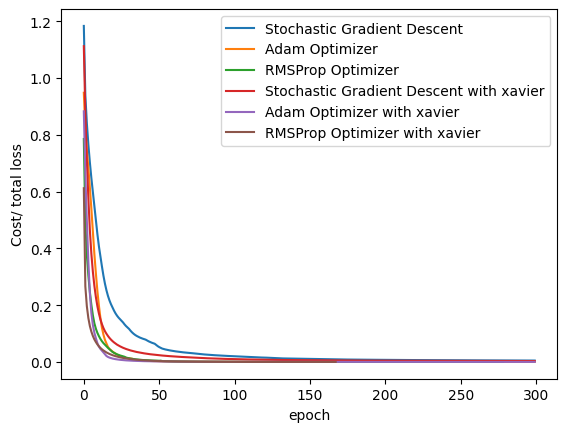

In [63]:
loss_SGD = list_model[0].loss_history
loss_Adam = list_model[2].loss_history
loss_rmsprop = list_model[4].loss_history
loss_SGD_xavier = list_model[1].loss_history
loss_Adam_xavier = list_model[3].loss_history
loss_rmsprop_xavier = list_model[5].loss_history
plt.plot(loss_SGD, label = "Stochastic Gradient Descent")
plt.plot(loss_Adam, label = "Adam Optimizer")
plt.plot(loss_rmsprop, label = 'RMSProp Optimizer')
plt.plot(loss_SGD_xavier, label = "Stochastic Gradient Descent with xavier")
plt.plot(loss_Adam_xavier, label = "Adam Optimizer with xavier")
plt.plot(loss_rmsprop_xavier, label = 'RMSProp Optimizer with xavier')
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

–î–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –º–∞—Å—à—Ç–∞–±–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ—ç—Ç–æ–º—É –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏ –±—ã–ª–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö.
–ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –æ–∫–∞–∑–∞–ª–æ—Å—å —Å—Ç–∞–±–∏–ª—å–Ω—ã–º –∏ –±–ª–∏–∑–∫–∏–º –∫ 1, –æ–¥–Ω–∞–∫–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è, —Ç–∞–∫ –∫–∞–∫ –∑–∞—Ä–∞–Ω–µ–µ –±—ã–ª–∞ –≤—ã–¥–µ–ª–µ–Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞, –∫–æ—Ç–æ—Ä—É—é –º–æ–¥–µ–ª—å –Ω–µ –≤–∏–¥–µ–ª–∞ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.
–ü–æ—ç—Ç–æ–º—É –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å –∏–º–µ–Ω–Ω–æ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º Scaler –¥–ª—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –¥–∞–Ω–Ω—ã–µ –∏–º–µ–ª–∏ —Ä–∞–∑–Ω—ã–µ –º–∞—Å—à—Ç–∞–±—ã, —á—Ç–æ –º–µ—à–∞–ª–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ä–∞–±–æ—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤.

In [64]:
X_df = df.drop('target', axis=1)
y_df = df['target']

X = torch.tensor(X_df.values, dtype=torch.float32)
y = torch.tensor(y_df.values, dtype=torch.long) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 


In [65]:
list_mode = [RandomNetwork(), XavierNetwork()]
list_acc = []
list_model = []
list_valid = []
for opt_name,_ in optims.items():
    for i in range(2):
        model = AdvancedModel(initializer=list_mode[i], input_dim=13, hidden_dim=4, output_dim=3, batch_norm=False)
        model_list.append(model)
        loss_fn = nn.CrossEntropyLoss()
        opt = optims[opt_name]['function']
        optimizer = opt(model.parameters(), **optims[opt_name]['params'])
        list_model.append(model)
        acc = train_model(model,loss_fn, optimizer, X_train, y_train, X_test, y_test,  n_epochs=300)
        print(f"Test accuracy {opt_name} + {type(list_mode[i]).__name__}: %.2f " % acc)


Test accuracy SGD + RandomNetwork: 0.39 
Test accuracy SGD + XavierNetwork: 0.39 
Test accuracy Adam + RandomNetwork: 1.00 
Test accuracy Adam + XavierNetwork: 0.39 
Test accuracy RMSProp + RandomNetwork: 0.97 
Test accuracy RMSProp + XavierNetwork: 0.39 


–í—ã—à–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –±–µ–∑ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ!